In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [14]:
df = pd.read_csv('./data.csv')
print(df)

    Accuracy(%)  Avg. Reaction Time(s)
0          92.3                   1.98
1         100.0                   2.32
2          98.0                   1.85
3          96.3                   1.35
4         100.0                   1.80
5          81.0                   2.26
6          87.9                   1.56
7          89.0                   1.90
8          85.0                   2.11
9          88.7                   2.43
10         89.4                   1.43
11         94.7                   1.24
12         92.3                   1.58
13         85.3                   2.13
14         88.6                   2.33
15         93.4                   1.34
16         98.2                   1.23
17         97.7                   1.45
18         86.4                   2.65
19         90.0                   1.45
20         98.2                   1.30


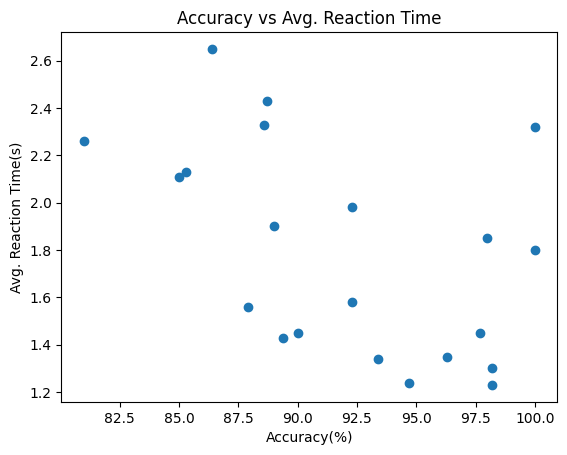

In [15]:
plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'])
plt.xlabel('Accuracy(%)')
plt.ylabel('Avg. Reaction Time(s)')
plt.title('Accuracy vs Avg. Reaction Time')
plt.show()

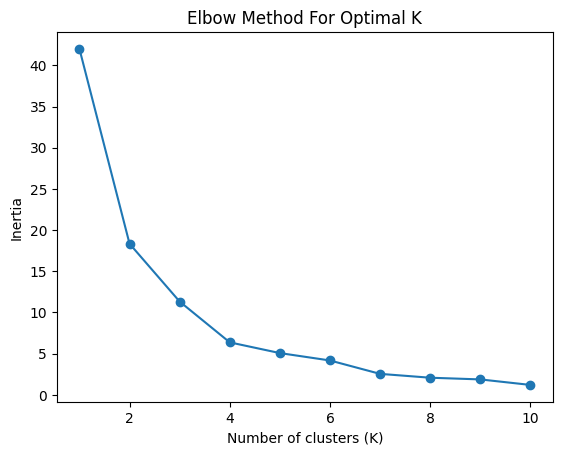

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

Optimal K is 4

In [32]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(X_scaled)

df['Cluster'] = labels_4
print(df)

    Accuracy(%)  Avg. Reaction Time(s)  Cluster
0          92.3                   1.98        0
1         100.0                   2.32        2
2          98.0                   1.85        2
3          96.3                   1.35        1
4         100.0                   1.80        2
5          81.0                   2.26        3
6          87.9                   1.56        0
7          89.0                   1.90        0
8          85.0                   2.11        3
9          88.7                   2.43        3
10         89.4                   1.43        0
11         94.7                   1.24        1
12         92.3                   1.58        0
13         85.3                   2.13        3
14         88.6                   2.33        3
15         93.4                   1.34        1
16         98.2                   1.23        1
17         97.7                   1.45        1
18         86.4                   2.65        3
19         90.0                   1.45  

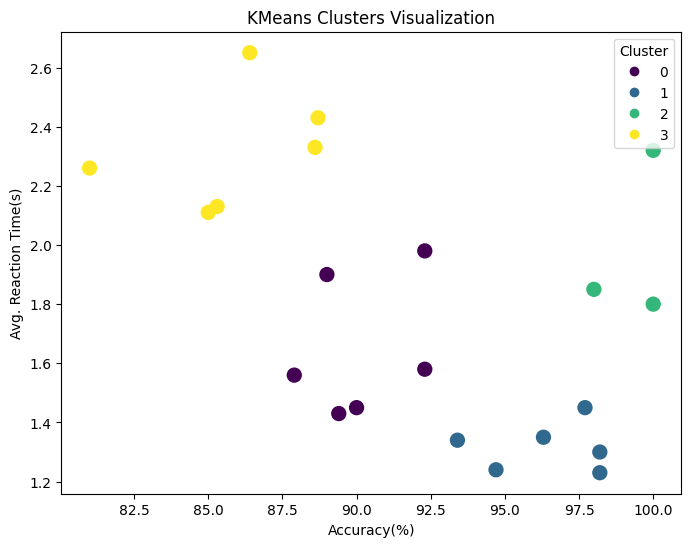

In [33]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Accuracy(%)')
plt.ylabel('Avg. Reaction Time(s)')
plt.title('KMeans Clusters Visualization')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [34]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_scaled, df['Cluster'])

y_pred = svm.predict(X_scaled)
print("Predicted cluster labels:", y_pred)

Predicted cluster labels: [0 2 2 1 2 3 0 0 3 3 0 1 0 3 3 1 1 1 3 0 1]


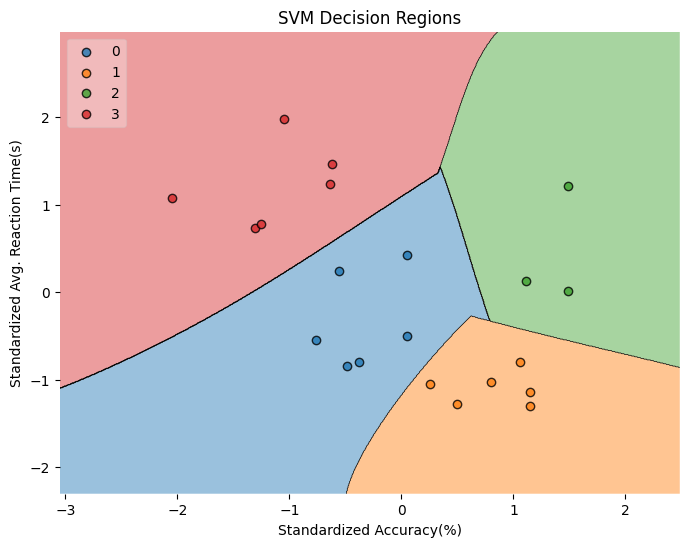

In [35]:

plt.figure(figsize=(8, 6))
plot_decision_regions(X_scaled, df['Cluster'].values, clf=svm, legend=2, markers='o')
plt.xlabel('Standardized Accuracy(%)')
plt.ylabel('Standardized Avg. Reaction Time(s)')
plt.title('SVM Decision Regions')
plt.show()

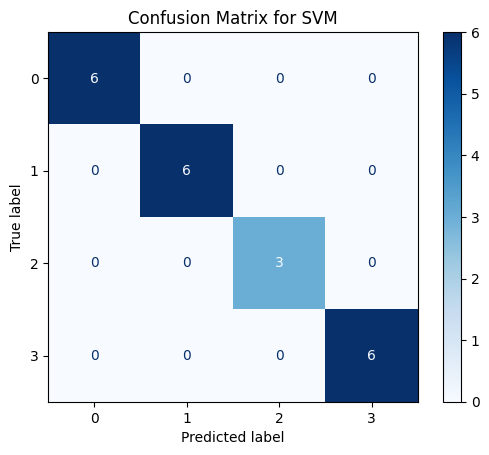

In [36]:

cm = confusion_matrix(df['Cluster'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df['Cluster']))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()

In [37]:
df['Predicted_Cluster'] = y_pred
print(df[['Accuracy(%)', 'Avg. Reaction Time(s)', 'Cluster', 'Predicted_Cluster']])

    Accuracy(%)  Avg. Reaction Time(s)  Cluster  Predicted_Cluster
0          92.3                   1.98        0                  0
1         100.0                   2.32        2                  2
2          98.0                   1.85        2                  2
3          96.3                   1.35        1                  1
4         100.0                   1.80        2                  2
5          81.0                   2.26        3                  3
6          87.9                   1.56        0                  0
7          89.0                   1.90        0                  0
8          85.0                   2.11        3                  3
9          88.7                   2.43        3                  3
10         89.4                   1.43        0                  0
11         94.7                   1.24        1                  1
12         92.3                   1.58        0                  0
13         85.3                   2.13        3               

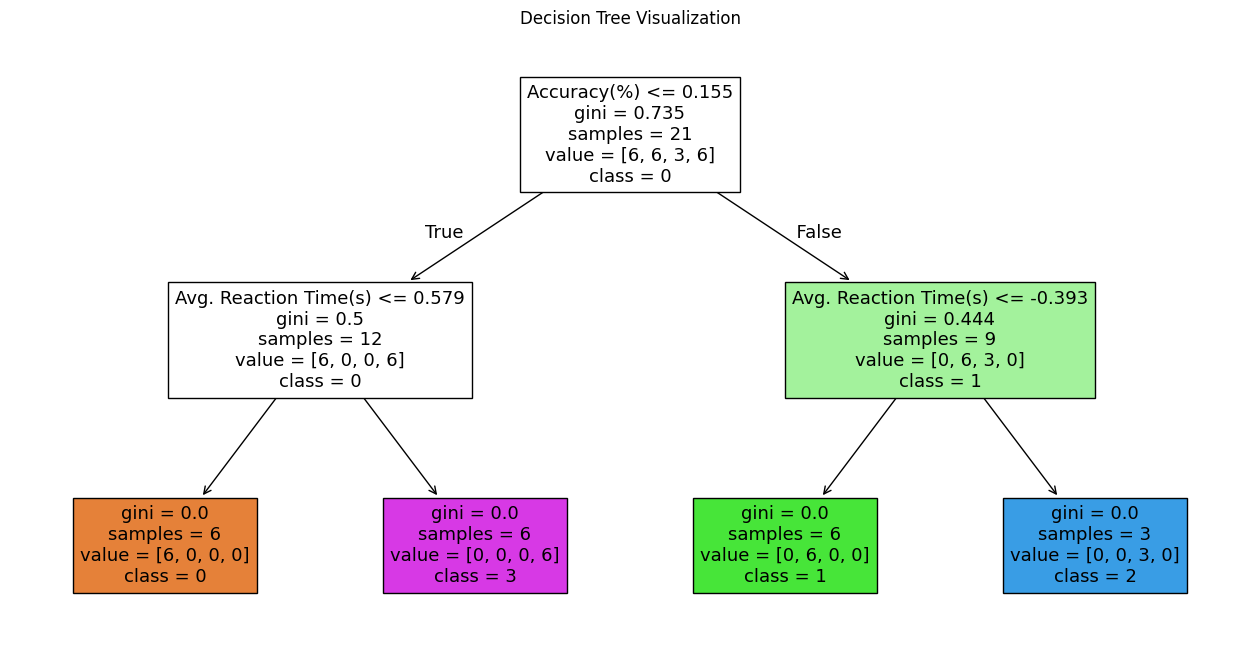

In [ ]:

plt.figure(figsize=(16, 8))
tree.plot_tree(dtree, feature_names=df.columns[:2], class_names=[str(c) for c in np.unique(df['Cluster'])], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

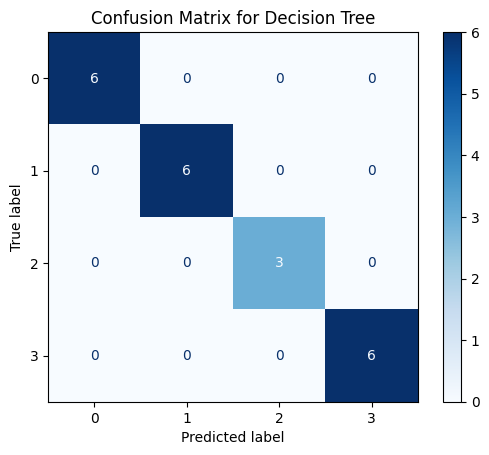

In [ ]:

cm_tree = confusion_matrix(df['Cluster'], y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=np.unique(df['Cluster']))
disp_tree.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()